In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation
from functools import reduce

Text(0.5, 0, 'Age')

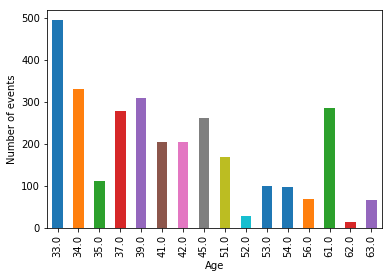

In [12]:
events = pd.read_csv("timeseries_events.csv")
users  = pd.read_csv("timeseries_users.csv")
events = events.drop_duplicates() #many duplocates! idk if it was intentionally (to have same event for a user) or not I removed them, simply comment
users  = users.drop_duplicates()

#P1
df_events_users = pd.merge(events, users, how ='left', on=['user_id']) 
df_events_users.dropna(inplace=True)
df_events_users = df_events_users[(df_events_users["age"] >= 30) & (df_events_users["gender"] == 'm')].reset_index()

#number of events for each age
df_events_count_age=df_events_users.copy()
df_events_count_age.groupby('age')['event_date'].count().plot.bar()
plt.ylabel('Number of events')
plt.xlabel('Age')

Text(0, 0.5, 'Number of users')

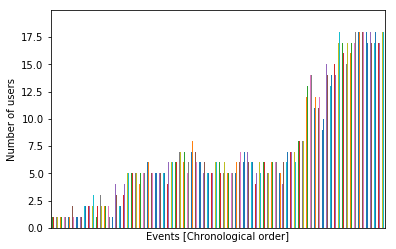

In [13]:
#number of users for each event
df_users_count_event=df_events_users.copy()
df_users_count_event.groupby('event_date')['user_id'].count().plot.bar()
plt.xticks([],)
plt.xlabel('Events [Chronological order]')
plt.ylabel('Number of users')

In [14]:
#doooo bining

Text(24.125, 0.5, 'Number of users')

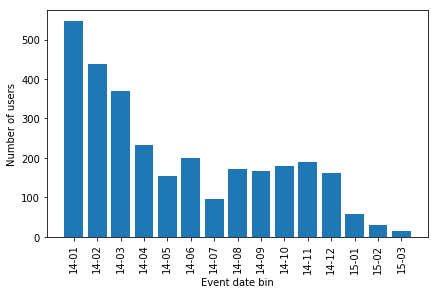

In [15]:
#number of users for each bin-event (a user may have been in multiple events in this bin)
##temp
df_users_count_event['users_count_event'] = df_users_count_event.groupby('event_date')['user_id'].transform('count')
df_users_count_event = df_users_count_event[['event_date','users_count_event']]
df_users_count_event = df_users_count_event.drop_duplicates()
##temp
bins_dt = pd.date_range('2014-01-01', freq='1M', periods=20) #bins
bins_str = bins_dt.astype(str).values
labels = ['({}, {}]'.format(bins_str[i-1], bins_str[i]) for i in range(1, len(bins_str))]
df_users_count_event['event_date'] = df_users_count_event['event_date'].astype('datetime64[ns]')
df_users_count_event['event_date_range'] = pd.cut(df_users_count_event.event_date.astype(np.int64)//10**9,bins=bins_dt.astype(np.int64)//10**9,labels=labels)
df_users_count_event['event_date_range_count'] = df_users_count_event.groupby('event_date_range')['users_count_event'].transform('sum') # Adds new column for count of events
df_users_count_event = df_users_count_event[['event_date_range','event_date_range_count']]
df_users_count_event = df_users_count_event.drop_duplicates()
plt.bar(x=df_users_count_event['event_date_range'], height=df_users_count_event['event_date_range_count'])
tick_labels = [labels[i][3:8] for i in range(0, len(labels))]
plt.xticks(df_users_count_event['event_date_range'], tick_labels, rotation='vertical')
plt.tight_layout()
plt.xlabel('Event date bin')
plt.ylabel('Number of users')